<h1><center>Home Credit Default Risk Use Case EDA</center></h1>
<h2><center>By Sarah Elzahaby - ITI AI</center></h2>

## Problem Statement:
    - Enhancing Predictive Algorithms for Home Credit Group to improve the accuracy of their loan repayment predictions.
    - Optimizing Loan Terms, thereby fostering a positive borrowing experience and financial stability among underserved populations.


## About the dataset

- This image contains the description of how the data works<br>

<img src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png"></img>

### 1. Importing Libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

### 2. Read the dataset

In [123]:
train_df = pd.read_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/application_train.csv')

test_df = pd.read_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/application_test.csv')

bureau_df = pd.read_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/bureau.csv')

### 3. Data investigation

In [124]:
print(train_df.shape)
train_df.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [125]:
# Load the test data
print(test_df.shape)
test_df.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [126]:
print(bureau_df.shape)
bureau_df.head()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [127]:
test_df.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [128]:
# This contains the train data to be predict, information of client and the target variable
train_df_cols = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE','CODE_GENDER', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED', 'NAME_FAMILY_STATUS','ORGANIZATION_TYPE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']

application_train_filter = train_df.filter(items= train_df_cols)

application_train_filter.to_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/train_df_filtered.csv')

In [129]:
# This file contains information of client and the test data to be predicted
test_df_cols = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE','CODE_GENDER', 'CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','FLAG_OWN_CAR','FLAG_OWN_REALTY''NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','NAME_FAMILY_STATUS','ORGANIZATION_TYPE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

application_test_filter = test_df.filter(items = test_df_cols)

application_test_filter.to_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/test_df_filtered.csv')

In [130]:
# This contains details of each person's previous loan
bureau_cols = ['SK_ID_CURR', 'CREDIT_ACTIVE', 'DAYS_CREDIT','CNT_CREDIT_PROLONG','AMT_CREDIT_SUM','CREDIT_TYPE','DAYS_CREDIT_UPDATE','AMT_ANNUITY']

prev_loan_filtered = bureau_df.filter(items = bureau_cols)
prev_loan_filtered.to_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/prev_loan_filtered.csv')

In [131]:
train_df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [132]:
train_df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [133]:
bureau_df.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

In [134]:
prev_loan_filtered.columns.values

array(['SK_ID_CURR', 'CREDIT_ACTIVE', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'], dtype=object)

In [135]:
train_df_filtered = pd.read_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/train_df_filtered.csv')

test_df_filtered = pd.read_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/test_df_filtered.csv')

prev_loan_filtered = pd.read_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/prev_loan_filtered.csv')

In [136]:
train_df_filtered.drop('Unnamed: 0', axis=1, inplace=True)
test_df_filtered.drop('Unnamed: 0', axis=1, inplace=True)
prev_loan_filtered.drop('Unnamed: 0', axis=1, inplace=True)

In [137]:
# # merge train_df_filtered and prev_loan_filtered
# train_df_filtered = train_df_filtered.merge(prev_loan_filtered, on='SK_ID_CURR', how='left')

# train_df_filtered.to_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Datasets/train_df_filtered.csv')

#### Check Missing data

In [138]:
# function to get num of null values in each column and percentage of it
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending= False)
    percent = (data.isnull().mean() * 100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [139]:
# missing data in train_df_filtered top 10
missing_data(train_df_filtered)

,Total,Percent
OWN_CAR_AGE,202929,65.990810
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650
DAYS_LAST_PHONE_CHANGE,1,0.000325
NAME_EDUCATION_TYPE,0,0.000000
ORGANIZATION_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
DAYS_EMPLOYED,0,0.000000
DAYS_BIRTH,0,0.000000
NAME_HOUSING_TYPE,0,0.000000


OWN_CAR_AGE has most null values, while AMT_ANNUITY, CNT_FAM_MEMBERS, DAYS_LAST_PHONE_CHANGE have small null values.

In [140]:
# missing data in test_df_filtered top 10
missing_data(test_df_filtered).head(10)

,Total,Percent
OWN_CAR_AGE,32312,66.289184
AMT_ANNUITY,24,0.049237
SK_ID_CURR,0,0.000000
NAME_HOUSING_TYPE,0,0.000000
CNT_FAM_MEMBERS,0,0.000000
ORGANIZATION_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
DAYS_EMPLOYED,0,0.000000
DAYS_BIRTH,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000


OWN_CAR_AGE, AMT_ANNUITY in test_df_filtered contains null.

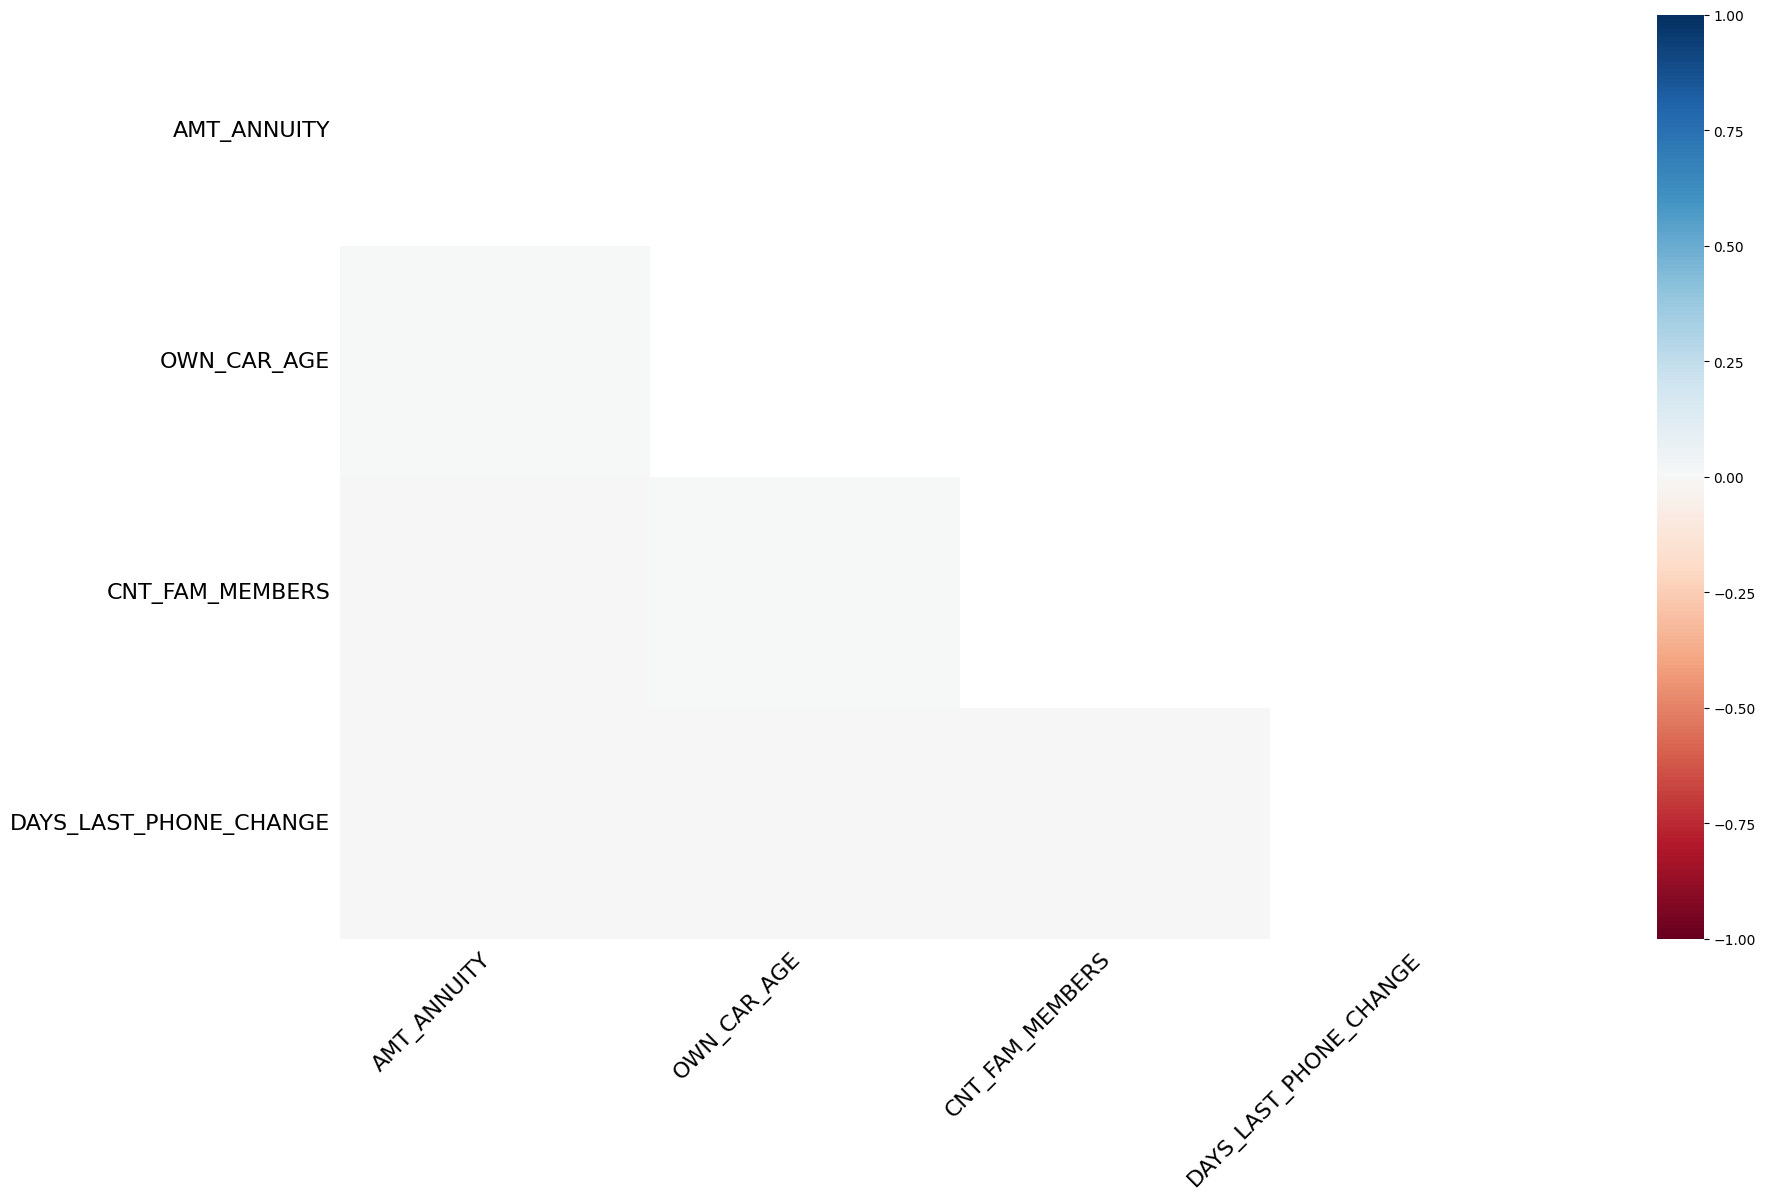

In [141]:
import missingno as msno # using missing data visualization module

# Heatmap for verify if missing data are correlated to each other or not in train_df_filtered
ax = msno.heatmap(train_df_filtered)
ax.get_figure().savefig('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/missing_data_heatmap.png')

**There is no correlation between them**

In [142]:
# fill nulls in train_df_filtered['OWN_CAR_AGE'] with 0
train_df_filtered['OWN_CAR_AGE'].fillna(0, inplace=True)

In [143]:
# drop nulls in train_df_filtered as it's small number
train_df_filtered.dropna(inplace=True)

In [144]:
# fill nulls in test_df_filtered['OWN_CAR_AGE'] with 0
test_df_filtered['OWN_CAR_AGE'].fillna(0, inplace=True)

In [145]:
# drop nulls in test_df_filtered as it's small number
test_df_filtered.dropna(inplace=True)

In [146]:
# save the cleaned data in new csv files
test_df_filtered.to_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/application_test.csv')
train_df_filtered.to_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/application_train.csv')
prev_loan_filtered.to_csv('D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/bureau.csv')

### 4. Data Exploration

**Questions to answer**

- Which features?

- what is their impact on whether the loan is repaid or not?

- And how these features affect repayment?

#### Barplot function

In [147]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bars(df, labels, title, multi):
    x = np.arange(1, df.shape[0] + 1)
    color_list = ['#00408a', '#0052b0', '#0264d4', '#0777f7', '#2189ff', '#3895ff', '#4fa1ff', '#66adff', '#78b7ff', '#8cc2ff']
    
    if multi:
        fig, ax = plt.subplots(figsize=(15, 5))
        width_bar = 0.9
        font = 12
    else:
        fig, ax = plt.subplots(figsize=(10, 5))
        width_bar = 0.2
        font = 14
    
    bars = ax.bar(x, df['values'], width_bar, color=color_list[:df.shape[0]])  # Ensure color_list is not exceeded
    
    ax.grid(False)
    
    # Adjust the title position and set it properly using set_title
    ax.set_title(title, fontsize=16, color='#787878', weight='bold', pad=20)
    
    title = title.replace(' ', '_')
    ax.set_xticks(x)
    ax.set_xticklabels(df['labels'])
    
    for idx, i in enumerate(bars):
        height_bar = i.get_height()
        ax.annotate(
            '{:.1f}%'.format(100 * height_bar / df['values'].sum()),
            xy=(i.get_x() + i.get_width() / 2, height_bar),
            ha='center',
            va='bottom',
            fontsize=font,
            color="black")
    
    # Use tight_layout to avoid overlaps
    plt.tight_layout()
    
    plt.savefig(f'D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/{title}.png')
    plt.show()


#### 2 barplots function

In [148]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bars2(df, legend, col1, col2, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(1, df.shape[0] + 1)
    color_list = ['#0052b0']
    color_list1 = ['#78b7ff']
    width_bar = 0.2

    bar1 = ax.bar(x - width_bar / 2, col1, width_bar, color=color_list)
    bar2 = ax.bar(x + width_bar / 2, col2, width_bar, color=color_list1)

    ax.grid(False)

    # Set the title above the plot
    ax.set_title(title, fontsize=16, color='#787878', weight='bold', pad=20)

    title_filename = title.replace(' ', '_')
    ax.set_xticks(x)
    ax.set_xticklabels(df['Payment'])

    for b in bar1:
        height_bar = b.get_height()
        ax.annotate(
            '{:.1f}%'.format(100 * height_bar / col1.sum()),
            xy=(b.get_x() + b.get_width() / 2, height_bar),
            ha='center',
            va='bottom',
            fontsize=10,
            color="black"
        )

    for b in bar2:
        height_bar = b.get_height()
        ax.annotate(
            '{:.1f}%'.format(100 * height_bar / col2.sum()),
            xy=(b.get_x() + b.get_width() / 2, height_bar),
            ha='center',
            va='bottom',
            fontsize=10,
            color="black"
        )

    plt.legend(legend)
    
    # Use tight_layout to avoid overlaps
    plt.tight_layout()
    
    plt.savefig(f'D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/{title_filename}.png')
    plt.show()


#### 2 plots function

In [149]:
import numpy as np
import matplotlib.pyplot as plt

def plot_two_figures(df, col1, col2, title):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    x = np.arange(1, df.shape[0] + 1)
    color_list = ['#00408a', '#0052b0', '#0264d4', '#0777f7', '#2189ff', '#3895ff', '#4fa1ff', '#66adff', '#78b7ff', '#8cc2ff']
    color_list1 = ['#00408a', '#0052b0', '#0264d4', '#0777f7', '#2189ff', '#3895ff', '#4fa1ff', '#66adff', '#78b7ff', '#8cc2ff']
    width_bar = 0.9
    
    bar1 = ax[0].bar(x, col1, width_bar, color=color_list)
    bar2 = ax[1].bar(x, col2, width_bar, color=color_list1)

    ax[0].grid(False)
    ax[1].grid(False)

    # Set the main title for the entire figure
    fig.suptitle(title, fontsize=16, color='#787878', weight='bold', y=0.95)

    title_filename = title.replace(' ', '_')
    ax[0].set_title('Paid')
    ax[1].set_title('Not Paid')
    
    ax[0].set_xticks(x)
    ax[1].set_xticks(x)
    ax[0].set_xticklabels(df[df.columns[0]].values)
    ax[1].set_xticklabels(df[df.columns[0]].values)
    
    for idx, b in enumerate(bar1):
        height_bar = b.get_height()
        ax[0].annotate(
            '{:.1f}%'.format(100 * height_bar / col1.sum()),
            xy=(b.get_x() + b.get_width() / 2, height_bar),
            ha='center',
            va='bottom',
            fontsize=12,
            color="black"
        )
    
    for idx, b in enumerate(bar2):
        height_bar = b.get_height()
        ax[1].annotate(
            '{:.1f}%'.format(100 * height_bar / col2.sum()),
            xy=(b.get_x() + b.get_width() / 2, height_bar),
            ha='center',
            va='bottom',
            fontsize=12,
            color="black"
        )
    
    # Use tight_layout to avoid overlaps
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    plt.savefig(f'D:/ITI AI Alex/Courses/Jobs/Aman Holding/Data Scientist/home-credit-default-risk/Plots/{title_filename}.png')
    plt.show()


#### df value counts function

In [150]:
def df_value_counts(df, labels):
    df_counts = df.value_counts()
    dfs = pd.DataFrame({
        'labels': labels,
        'values': df_counts.values
    })
    return dfs

## 5. Analysis of Each Feature in the Dataset

#### **Total Repayment** Analysis

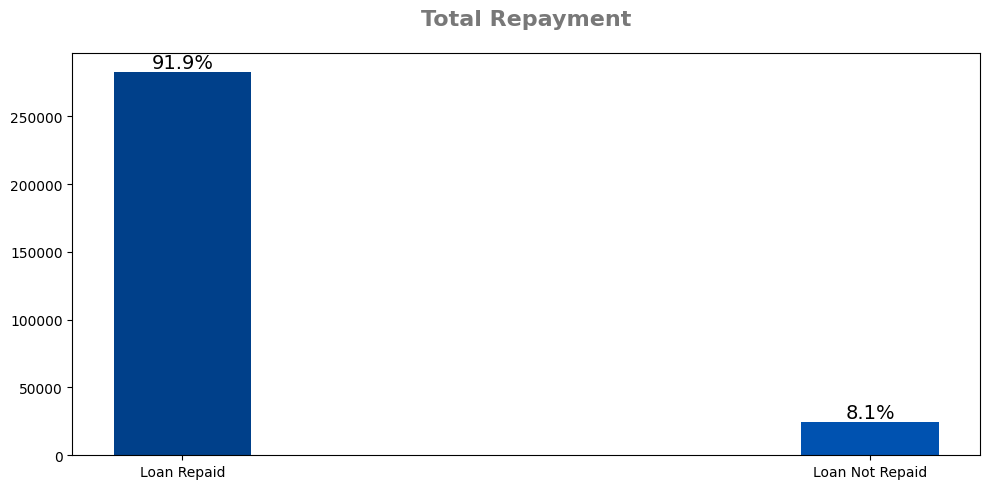

In [151]:
# Target = 0 --> Loan was repaid
# Target = 1 --> Loan was not repaid

labels = ['Loan Repaid', 'Loan Not Repaid']
plot_bars(df_value_counts(train_df_filtered['TARGET'], labels), labels, 'Total Repayment', False)

**NB. The non-paid loans are less than 10%**

#### Contract Type Analysis

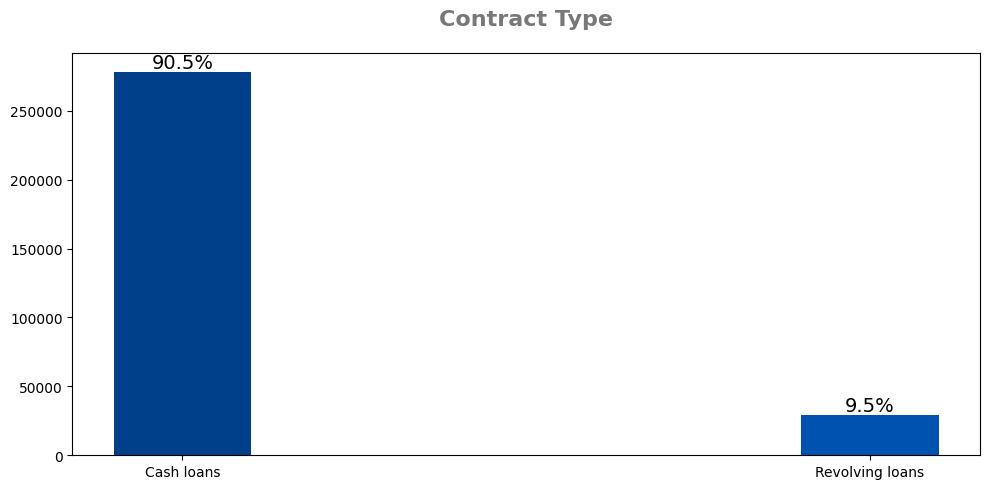

In [152]:
labels = ['Cash loans', 'Revolving loans']
plot_bars(df_value_counts(train_df_filtered['NAME_CONTRACT_TYPE'], labels), labels, 'Contract Type', False)

#### Check relation between **loan payments** and **contract type**

In [153]:
# Count of Cash_loans for each target value
Cash_loans = train_df_filtered[train_df_filtered['NAME_CONTRACT_TYPE'] == 'Cash loans'].filter(items= ['NAME_CONTRACT_TYPE', 'TARGET']).groupby('TARGET').count()

In [154]:
# Count of Revolving_loans for each target value
Revolving_loans = train_df_filtered[train_df_filtered['NAME_CONTRACT_TYPE'] == 'Revolving loans'].filter(items= ['NAME_CONTRACT_TYPE', 'TARGET']).groupby('TARGET').count()

In [155]:
# merge the two dataframes
df_merge = pd.concat([Cash_loans, Revolving_loans], axis=1, keys=['Cash Loans', 'Revolving Loans'])
labels = ['Loan Repaid', 'Loan Not Repaid']
labels = pd.Series(labels)

# merge the labels with the dataframe as Payment column
df_merge['Payment'] = labels

In [156]:
# put the data in a dataframe df_contract
df_contract = pd.DataFrame({
        'Payment': df_merge['Payment'].values,
        'Cash Loans': np.array(df_merge['Cash Loans'].values).reshape(1,2)[0],
        'Revolving Loans': np.array(df_merge['Revolving Loans'].values).reshape(1,2)[0]
})

df_contract

,Payment,Cash Loans,Revolving Loans
0,Loan Repaid,254998,27673
1,Loan Not Repaid,23221,1604


**We conclude that revolving loans are more repaid than cash loans, but cash loans are larger in quantity.**

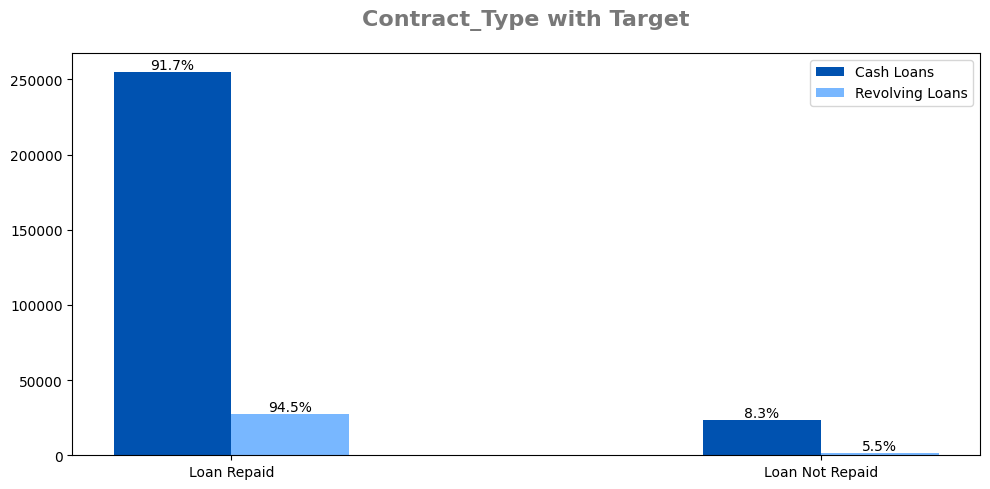

In [157]:
plot_bars2(df_contract, ['Cash Loans', 'Revolving Loans'], df_contract['Cash Loans'], df_contract['Revolving Loans'], 'Contract_Type with Target')

### Gender Relation Analysis

i have 2 options either drop the nans or replace them with the most frequent gender.

In [158]:
train_df_filtered['CODE_GENDER'].value_counts()

CODE_GENDER
F      202439
M      105053
XNA         4
Name: count, dtype: int64

In [159]:
# replace with f(majority class)
train_df_filtered.loc[train_df_filtered.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'

In [160]:
train_df_filtered['CODE_GENDER'].value_counts()

CODE_GENDER
F    202443
M    105053
Name: count, dtype: int64

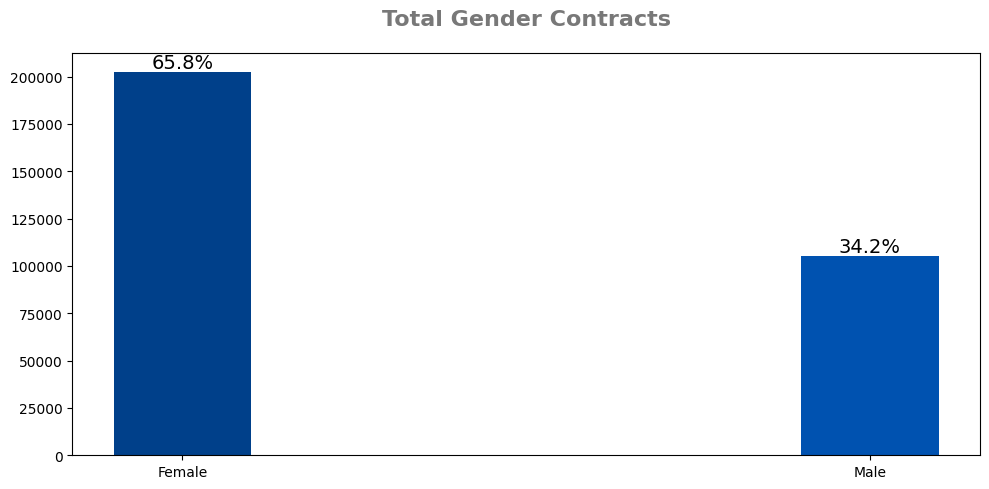

In [161]:
labels = ['Female', 'Male']
plot_bars(df_value_counts(train_df_filtered['CODE_GENDER'], labels), labels, 'Total Gender Contracts', False)

**We conclude that women contract loans more than men.**

#### Relation between **loan payments** and **gender**

In [162]:
# Count the female clients for each target value
F = train_df_filtered[train_df_filtered['CODE_GENDER'] == 'F'].filter(items=['TARGET', 'CODE_GENDER']).groupby(['TARGET']).count()

In [163]:
# Count the male clients for each target value
M = train_df_filtered[train_df_filtered['CODE_GENDER'] == 'M'].filter(items=['TARGET', 'CODE_GENDER']).groupby(['TARGET']).count()

In [164]:
# merge the two dataframes
df_merge = pd.concat([F, M], axis=1, keys=['Female', 'Male'])
labels = ['Loan Repaid', 'Loan Not Repaid']
labels = pd.Series(labels)

# merge the labels with the dataframe as Payment column
df_merge['Payment'] = labels

df_merge

,Female,Male,Payment
,CODE_GENDER,CODE_GENDER,
TARGET,,,
0,188273,94398,Loan Repaid
1,14170,10655,Loan Not Repaid


In [165]:
# put the data in a dataframe
df_gender = pd.DataFrame({
      'Payment': df_merge['Payment'].values,
      'Female': np.array(df_merge['Female'].values).reshape(1,2)[0],
      'Male': np.array(df_merge['Male'].values).reshape(1,2)[0]
})

df_gender

,Payment,Female,Male
0,Loan Repaid,188273,94398
1,Loan Not Repaid,14170,10655


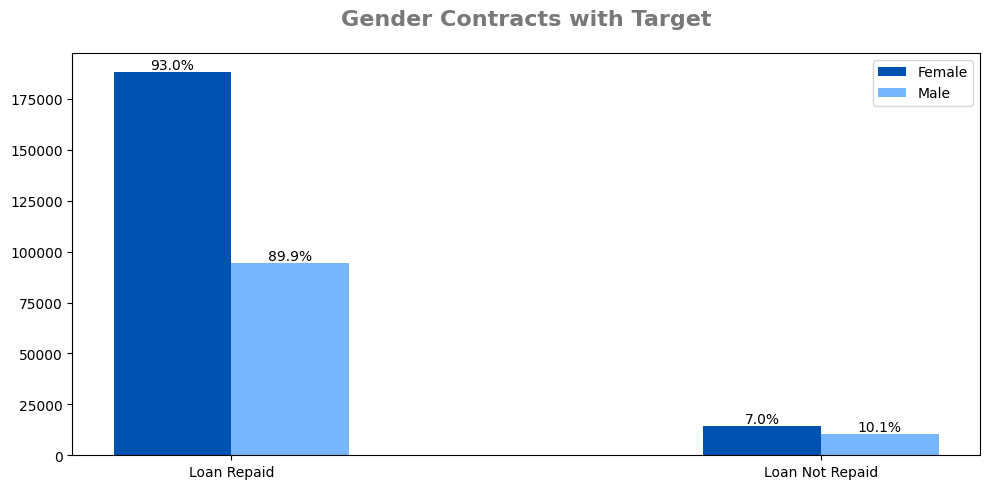

In [166]:
legend = ['Female', 'Male']
plot_bars2(df_gender, legend, df_gender['Female'], df_gender['Male'], 'Gender Contracts with Target')

### Own Car Analysis

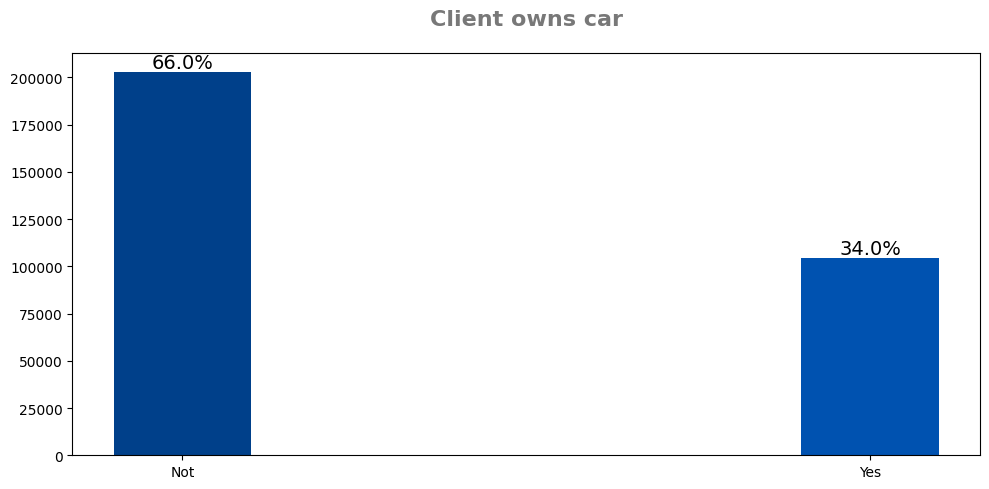

In [167]:
labels = ['Not', 'Yes']
plot_bars(df_value_counts(application_train_filter['FLAG_OWN_CAR'], labels), labels,  'Client owns car', False)

In [168]:
# Count the clients who own a car for each target value
No_car = application_train_filter[application_train_filter['FLAG_OWN_CAR'] == 'Y'].filter(['TARGET','FLAG_OWN_CAR']).groupby('TARGET').count()

In [169]:
# Count the clients who own a car for each target value
Yes_car = application_train_filter[application_train_filter['FLAG_OWN_CAR'] == 'N'].filter(['TARGET','FLAG_OWN_CAR']).groupby('TARGET').count()

#### Checking **payment** with **car_own**

In [170]:
# merge the two dataframes
df_merge = pd.concat([No_car, Yes_car], axis=1, keys=['Not', 'Yes'])
labels = ['Loan Repaid', 'Loan Not Repaid']
labels = pd.Series(labels)

# merge the labels with the dataframe as Payment column
df_merge['Payment'] = labels

df_merge

,Not,Yes,Payment
,FLAG_OWN_CAR,FLAG_OWN_CAR,
TARGET,,,
0,97011,185675,Loan Repaid
1,7576,17249,Loan Not Repaid


In [171]:
# put the data in a dataframe
df_car = pd.DataFrame({
      'Payment': df_merge['Payment'].values,
      'Not': np.array(df_merge['Not'].values).reshape(1,2)[0],
      'Yes': np.array(df_merge['Yes'].values).reshape(1,2)[0]
})

df_car

,Payment,Not,Yes
0,Loan Repaid,97011,185675
1,Loan Not Repaid,7576,17249


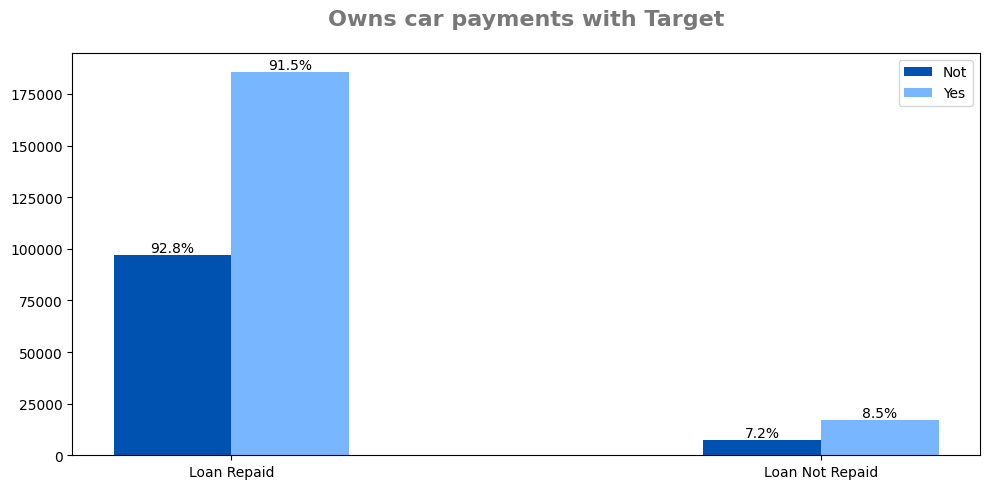

In [172]:
legend = ['Not', 'Yes']
plot_bars2(df_car, legend, df_car['Not'], df_car['Yes'], 'Owns car payments with Target')

**People who own a car are more likely to repay the loan than others who don't own.**

### Number of Children Analysis

In [173]:
# Count the clients who have children
children = train_df_filtered['CNT_CHILDREN'].value_counts().index.values

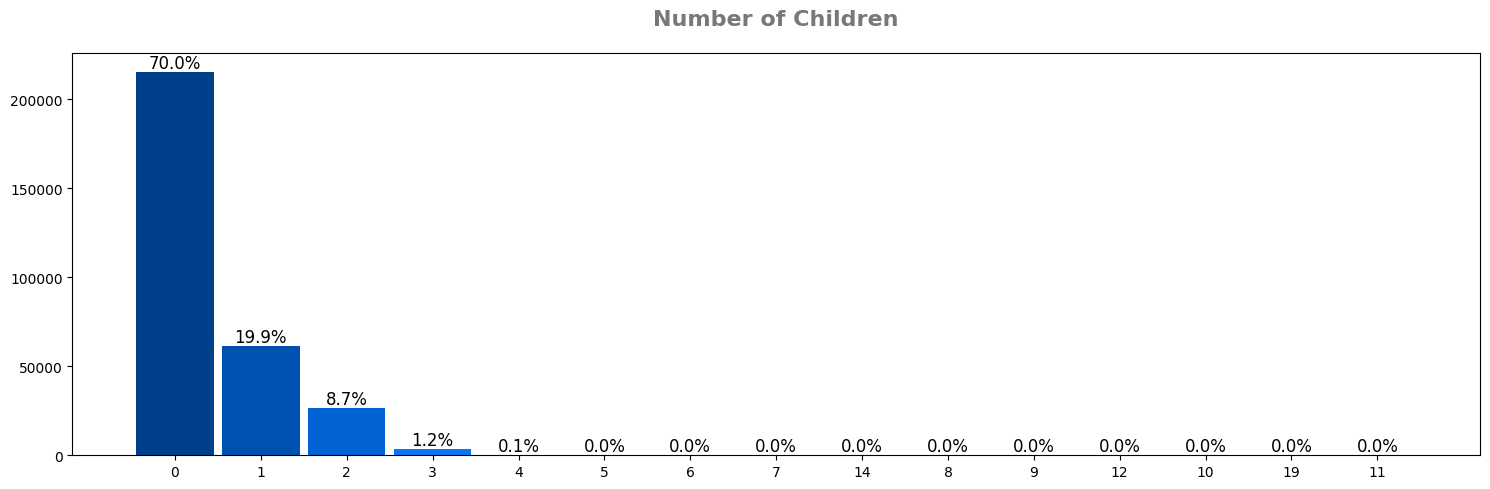

In [174]:
# plot the children count
labels = children
plot_bars(df_value_counts(train_df_filtered['CNT_CHILDREN'], labels), labels, 'Number of Children', True)

**Clients who do not have children are the ones who apply for loans the most.**

#### Checking **payments** relation with **children**.

In [175]:
labels = ['Loan Repaid', 'Loan Not Repaid']
labels = pd.Series(labels)
df_children = pd.DataFrame({'Payment': labels,
})

# loop through the children count and get the count of each with target value
for i in train_df_filtered['CNT_CHILDREN'].value_counts().index:
    value = train_df_filtered[train_df_filtered['CNT_CHILDREN'] == i]\
    .filter(['TARGET','CNT_CHILDREN']).groupby('TARGET').count().values.ravel()
    value = pd.Series(value)
    df_children[i] = value

In [176]:
df_children

,Payment,0,1,2,3,4,5,6,7,14,8,9,12,10,19,11
0,Loan Repaid,198747,55665,24416,3359,374,77,15,7.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0
1,Loan Not Repaid,16609,5454,2333,358,55,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
df_children.fillna(0, inplace = True)

In [178]:
labels = ['Loan Repaid', 'Loan Not Repaid']
labels = pd.Series(labels)
df_children = pd.DataFrame({
        'Children' : df_children.columns[1:].values,
        'paid' : df_children[df_children['Payment'] == 'Loan Repaid'].values.ravel()[1:],
        'Not paid': df_children[df_children['Payment'] == 'Loan Not Repaid'].values.ravel()[1:]
})

df_children

,Children,paid,Not paid
0,0,198747,16609
1,1,55665,5454
2,2,24416,2333
3,3,3359,358
4,4,374,55
5,5,77,7
6,6,15,6
7,7,7.0,0.0
8,14,3.0,0.0
9,8,2.0,0.0


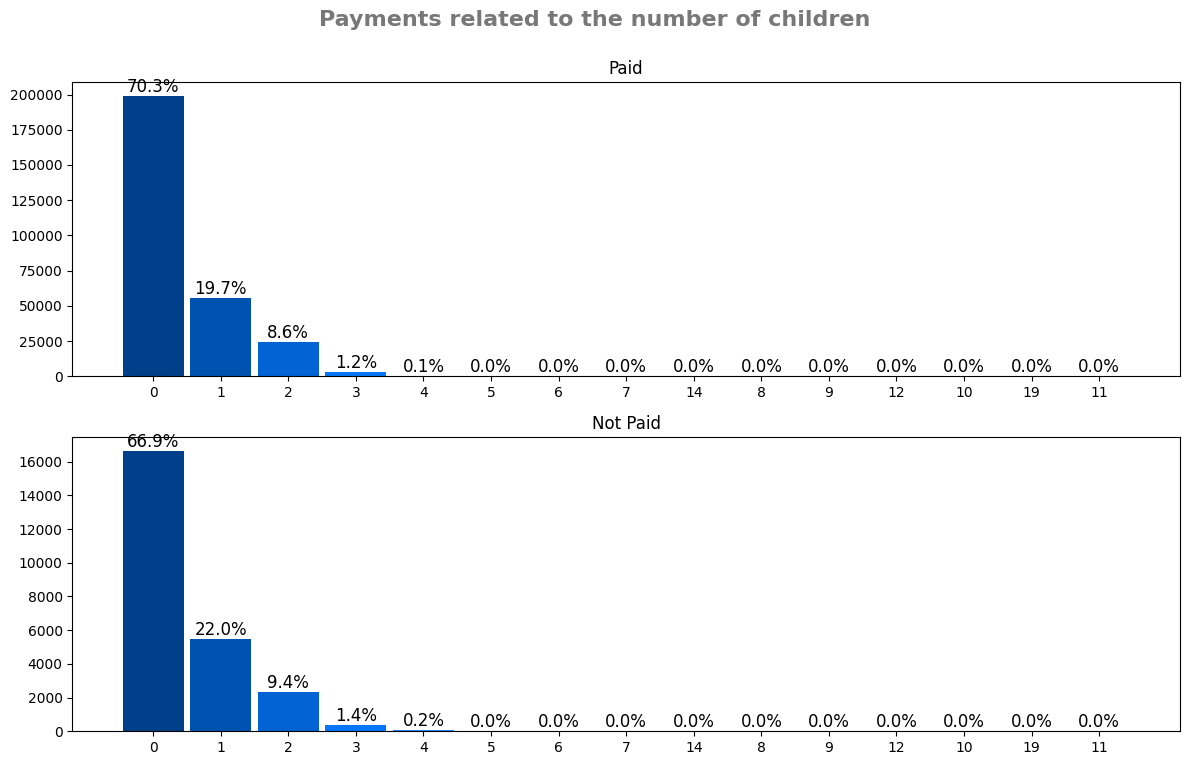

In [179]:
# plot the children count with target value
plot_two_figures(df_children, df_children['paid'], df_children['Not paid'], 'Payments related to the number of children')

**clients who has [1:4] children are more likely not to pay the loan.**

### Education Type Analysis

In [180]:
# Count the clients' Education type
train_df_filtered['NAME_EDUCATION_TYPE'].value_counts().index

Index(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype='object', name='NAME_EDUCATION_TYPE')

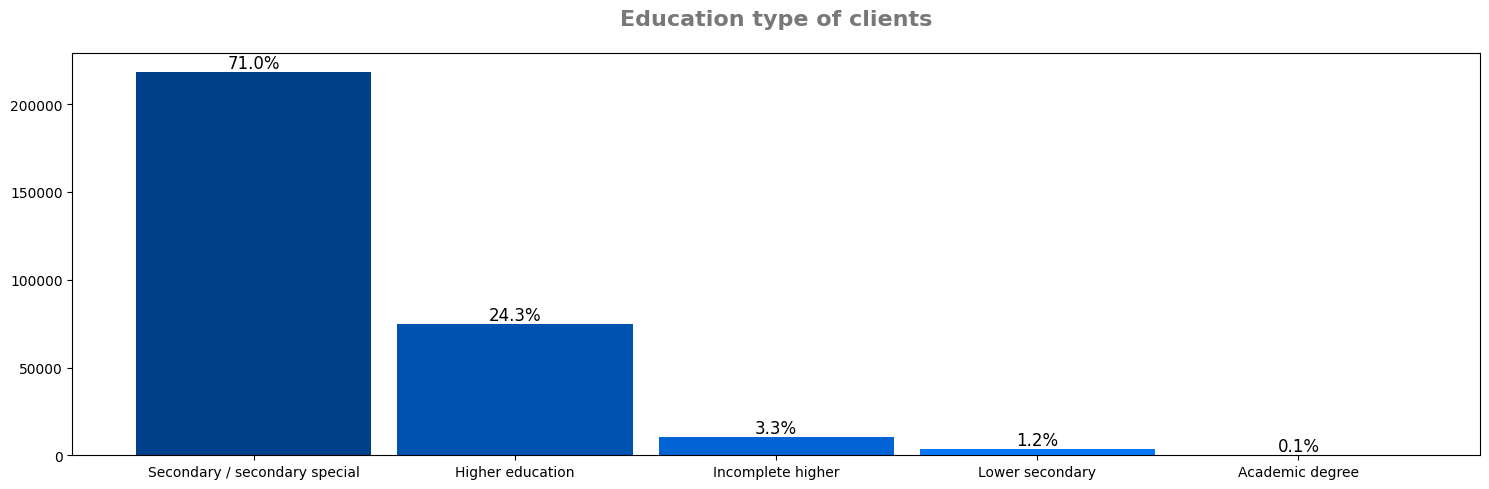

In [181]:
# plot the Education type count
plot_bars(df_value_counts(train_df_filtered['NAME_EDUCATION_TYPE'], train_df_filtered['NAME_EDUCATION_TYPE'].value_counts().index), train_df_filtered['NAME_EDUCATION_TYPE'].value_counts().index, 'Education type of clients', True)

**Most of clients have Secondary School**

In [182]:
labels = ['Loan Repaid', 'Loan Not Repaid']
labels = pd.Series(labels)
df_school = pd.DataFrame({
        'Payment': labels})

for i in application_train_filter['NAME_EDUCATION_TYPE'].value_counts().index:
        value = application_train_filter[application_train_filter['NAME_EDUCATION_TYPE'] == i]\
        .filter(['TARGET','NAME_EDUCATION_TYPE']).groupby('TARGET').count().values.ravel()
        value = pd.Series(value)
        df_school[i] = value

In [183]:
df_school

,Payment,Secondary / secondary special,Higher education,Incomplete higher,Lower secondary,Academic degree
0,Loan Repaid,198867,70854,9405,3399,161
1,Loan Not Repaid,19524,4009,872,417,3


#### Check relation of **payment** with **Education_type**

In [184]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_school = pd.DataFrame({
    'Education_Type' : df_school.columns[1:].values,
    'Paid' : df_school[df_school['Payment'] == 'Loan Repaid'].values.ravel()[1:],
    'Not Paid': df_school[df_school['Payment'] == 'Loan Not Repaid'].values.ravel()[1:]
})

df_school

,Education_Type,Paid,Not Paid
0,Secondary / secondary special,198867,19524
1,Higher education,70854,4009
2,Incomplete higher,9405,872
3,Lower secondary,3399,417
4,Academic degree,161,3


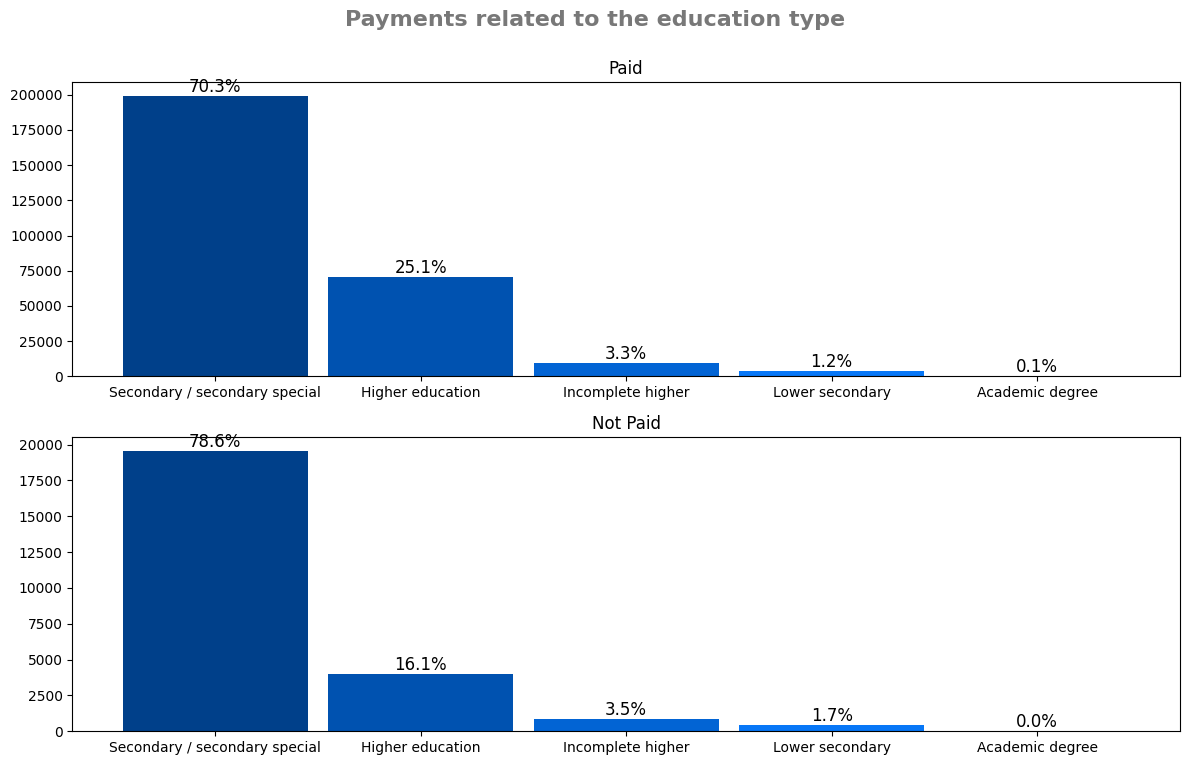

In [185]:
plot_two_figures(df_school, df_school['Paid'], df_school['Not Paid'], 'Payments related to the education type')

**NB. Most who has secondary school don't repay the loan**

### Housing Type Analysis

In [186]:
train_df_filtered['NAME_HOUSING_TYPE'].value_counts().index

Index(['House / apartment', 'With parents', 'Municipal apartment',
       'Rented apartment', 'Office apartment', 'Co-op apartment'],
      dtype='object', name='NAME_HOUSING_TYPE')

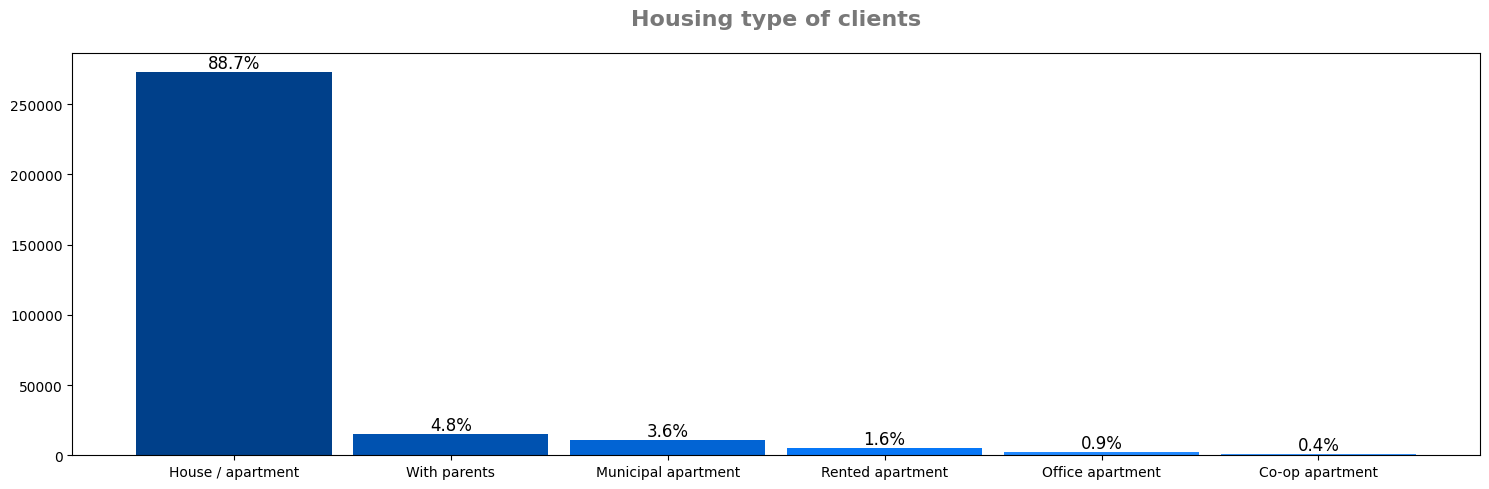

In [187]:
plot_bars(df_value_counts(train_df_filtered['NAME_HOUSING_TYPE'],\
train_df_filtered['NAME_HOUSING_TYPE'].value_counts().index),\
train_df_filtered['NAME_HOUSING_TYPE'].value_counts().index, 'Housing type of clients', True)

**NB. Majority of clients live in house/apartment and less 5% live with parents.**

#### Check relation of **payment** with **housing_type**

In [188]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_house = pd.DataFrame({
        'Payment': labels,
})

for i in train_df_filtered['NAME_HOUSING_TYPE'].value_counts().index:
        value = train_df_filtered[train_df_filtered['NAME_HOUSING_TYPE'] == i]\
        .filter(['TARGET','NAME_HOUSING_TYPE']).groupby('TARGET').count().values.ravel()
        value = pd.Series(value)
        df_house[i] = value

In [189]:
df_house

,Payment,House / apartment,With parents,Municipal apartment,Rented apartment,Office apartment,Co-op apartment
0,Paid,251584,13104,10226,4279,2445,1033
1,Not Paid,21272,1736,955,601,172,89


In [190]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_house = pd.DataFrame({
        'Housing_Type' : df_house.columns[1:].values,
        'Paid' : df_house[df_house['Payment'] == 'Paid'].values.ravel()[1:],
        'Not Paid': df_house[df_house['Payment'] == 'Not Paid'].values.ravel()[1:]
})

df_house

,Housing_Type,Paid,Not Paid
0,House / apartment,251584,21272
1,With parents,13104,1736
2,Municipal apartment,10226,955
3,Rented apartment,4279,601
4,Office apartment,2445,172
5,Co-op apartment,1033,89


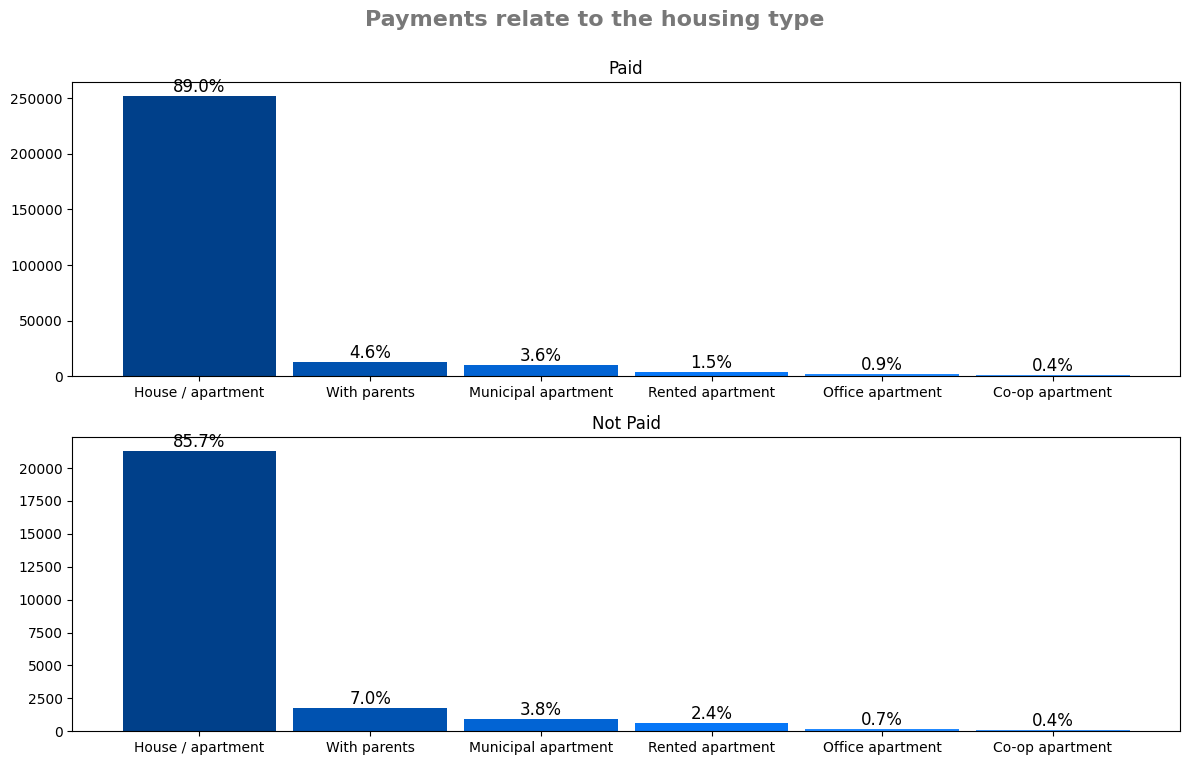

In [191]:
plot_two_figures(df_house, df_house['Paid'], df_house['Not Paid'], 'Payments relate to the housing type')

**The Largest number of clients who live alone didn't pay the loan**

### Family Status Analysis

In [192]:
train_df_filtered['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196424
Single / not married     45441
Civil marriage           29773
Separated                19770
Widow                    16088
Name: count, dtype: int64

**Most Clients are married, separated and widow close to each other.**

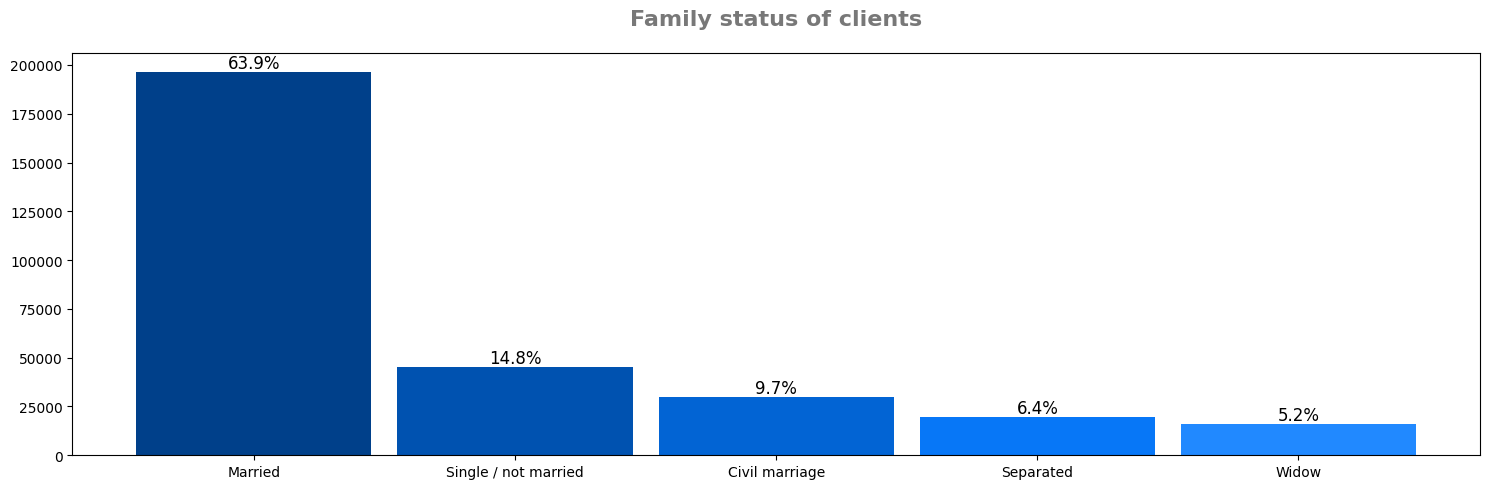

In [193]:
plot_bars(df_value_counts(train_df_filtered['NAME_FAMILY_STATUS'],\
train_df_filtered['NAME_FAMILY_STATUS'].value_counts().index) ,\
train_df_filtered['NAME_FAMILY_STATUS'].value_counts().index, 'Family status of clients', True)

#### Check **payment** relation with **Family_Status**

In [194]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_status = pd.DataFrame({
        'Payment': labels,
})

for i in train_df_filtered['NAME_FAMILY_STATUS'].value_counts().index:
        value = train_df_filtered[train_df_filtered['NAME_FAMILY_STATUS'] == i]\
        .filter(['TARGET','NAME_FAMILY_STATUS']).groupby('TARGET').count().values.ravel()
        value = pd.Series(value)
        df_status[i] = value

In [195]:
df_status

,Payment,Married,Single / not married,Civil marriage,Separated,Widow
0,Paid,181574,40984,26812,18150,15151
1,Not Paid,14850,4457,2961,1620,937


In [196]:
df_status.fillna(0, inplace=True)

In [197]:
df_status

,Payment,Married,Single / not married,Civil marriage,Separated,Widow
0,Paid,181574,40984,26812,18150,15151
1,Not Paid,14850,4457,2961,1620,937


In [198]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_status = pd.DataFrame({
        'Family_Status' : df_status.columns[1:].values,
        'Paid' : df_status[df_status['Payment'] == 'Paid'].values.ravel()[1:],
        'Not Paid': df_status[df_status['Payment'] == 'Not Paid'].values.ravel()[1:]
})
df_status

,Family_Status,Paid,Not Paid
0,Married,181574,14850
1,Single / not married,40984,4457
2,Civil marriage,26812,2961
3,Separated,18150,1620
4,Widow,15151,937


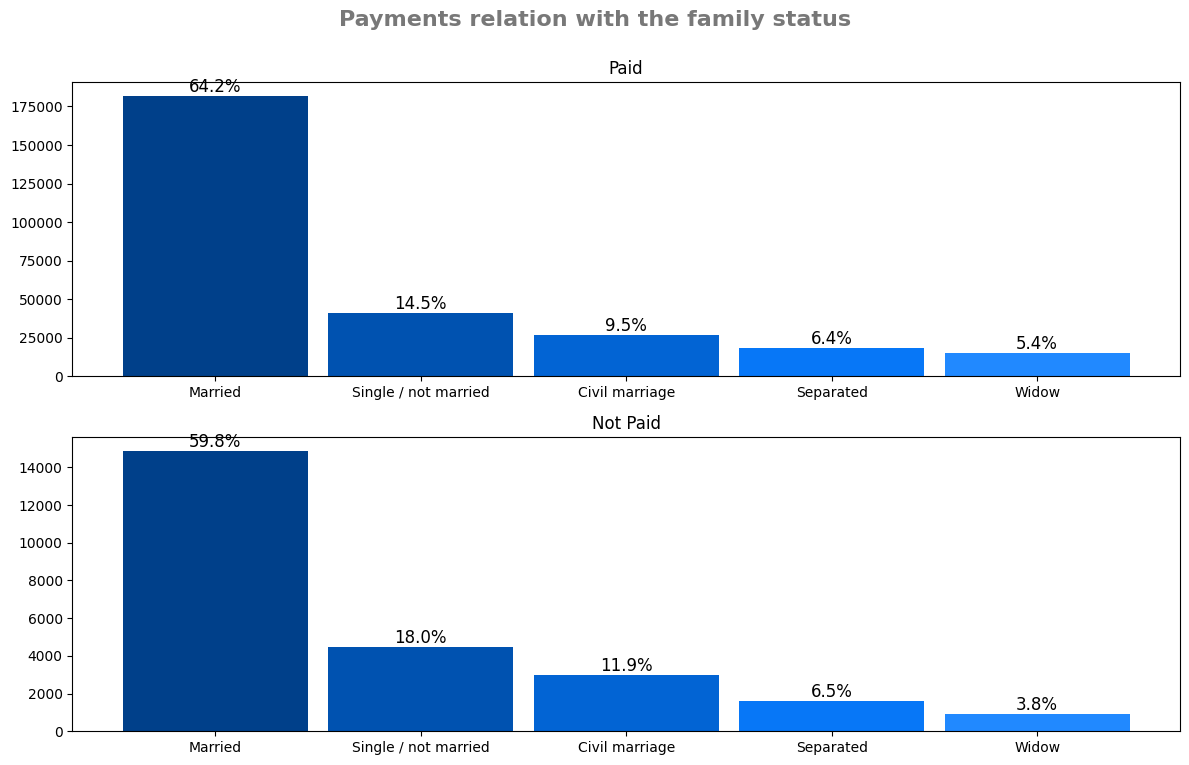

In [199]:
plot_two_figures(df_status, df_status['Paid'], df_status['Not Paid'], 'Payments relation with the family status')

**High % of married and single clients do not repay the loan**

### Organization Type Analysis

In [200]:
# top 10 organization type
train_df_filtered['ORGANIZATION_TYPE'].value_counts().head(10)

ORGANIZATION_TYPE
Business Entity Type 3    67989
XNA                       55374
Self-employed             38409
Other                     16681
Medicine                  11192
Business Entity Type 2    10552
Government                10403
School                     8893
Trade: type 7              7831
Kindergarten               6880
Name: count, dtype: int64

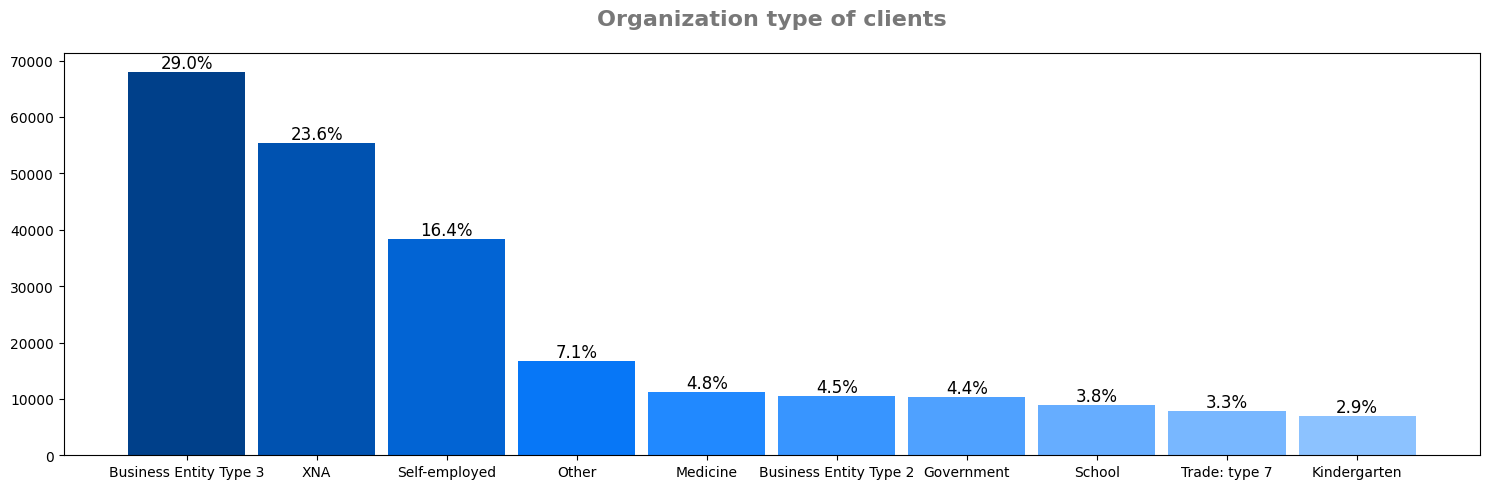

In [201]:
plot_bars(df_value_counts(train_df_filtered['ORGANIZATION_TYPE'], \
train_df_filtered['ORGANIZATION_TYPE'].value_counts().index)[0:10], \
train_df_filtered['ORGANIZATION_TYPE'].value_counts().index, 'Organization type of clients', True)

**23% is NAN: organization unknown**

#### Check the relation of **payment** with **organization_type**

In [202]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_org = pd.DataFrame({'Payment': labels})

for i in train_df_filtered['ORGANIZATION_TYPE'].value_counts().index:
    value = train_df_filtered[train_df_filtered['ORGANIZATION_TYPE'] == i]\
    .filter(['TARGET','ORGANIZATION_TYPE']).groupby('TARGET').count().values.ravel()
    value = pd.Series(value)
    df_org[i] = value

In [203]:
df_org

,Payment,Business Entity Type 3,XNA,Self-employed,Other,Medicine,Business Entity Type 2,Government,School,Trade: type 7,Kindergarten,Construction,Business Entity Type 1,Transport: type 4,Trade: type 3,Industry: type 9,Industry: type 3,Security,Housing,Industry: type 11,Military,Bank,Agriculture,Police,Transport: type 2,Postal,Security Ministries,Trade: type 2,Restaurant,Services,University,Industry: type 7,Transport: type 3,Industry: type 1,Hotel,Electricity,Industry: type 4,Trade: type 6,Industry: type 5,Insurance,Telecom,Emergency,Industry: type 2,Advertising,Realtor,Culture,Industry: type 12,Trade: type 1,Mobile,Legal Services,Cleaning,Transport: type 1,Industry: type 6,Industry: type 10,Religion,Industry: type 13,Trade: type 4,Trade: type 5,Industry: type 8
0,Paid,61666,52384,34501,15406,10455,9652,9677,8367,7091,6396,5936,5496,4897,3130,3143,2930,2922,2723,2470,2499,2377,2197,2224,2032,1975,1878,1767,1599,1471,1262,1202,1000,924,904,887,788,602,558,562,533,520,425,394,354,358,355,317,288,281,231,192,104,102,80,58,62,46,21
1,Not Paid,6323,2990,3908,1275,737,900,726,526,740,484,785,487,501,361,225,348,324,235,234,135,130,257,117,172,182,96,133,212,104,65,105,187,115,62,63,89,29,41,34,44,40,33,35,42,21,14,31,29,24,29,9,8,7,5,9,2,3,3


In [204]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_org = pd.DataFrame({
        'Organization_Type' : df_org.columns[1:].values,
        'Paid' : df_org[df_org['Payment'] == 'Paid'].values.ravel()[1:],
        'Not Paid': df_org[df_org['Payment'] == 'Not Paid'].values.ravel()[1:]
})

df_org.head()

,Organization_Type,Paid,Not Paid
0,Business Entity Type 3,61666,6323
1,XNA,52384,2990
2,Self-employed,34501,3908
3,Other,15406,1275
4,Medicine,10455,737


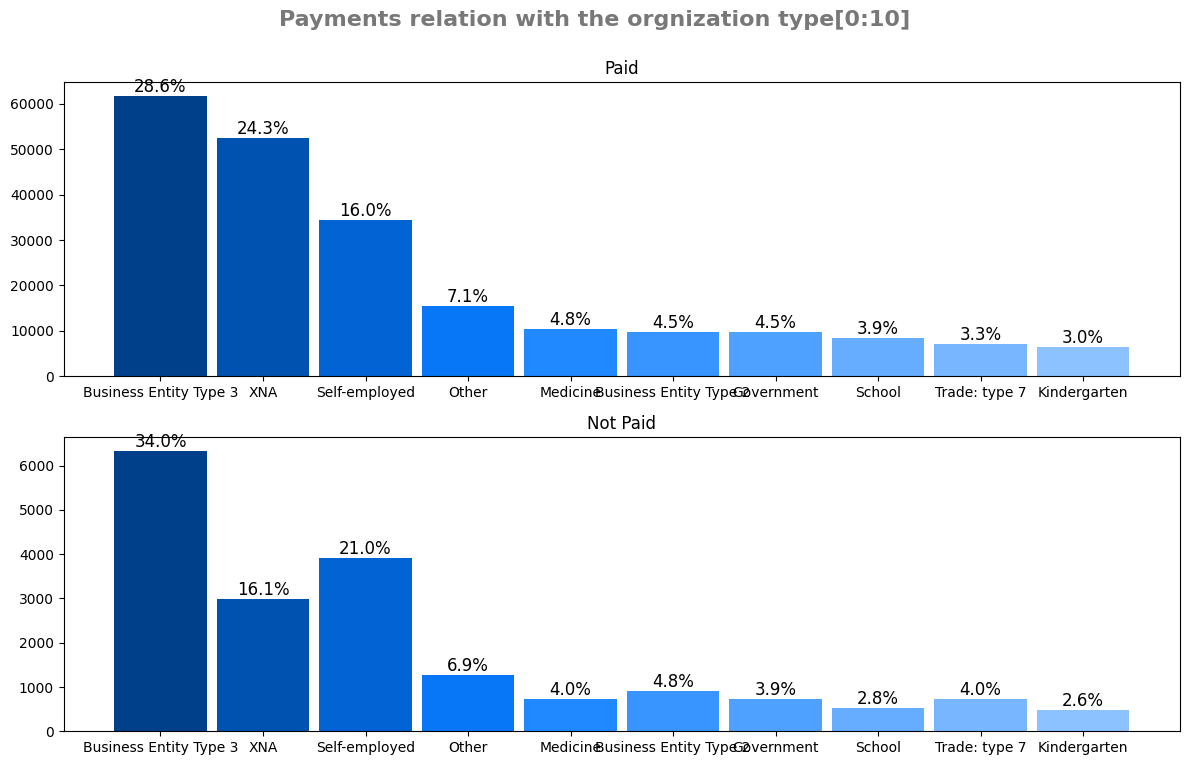

In [205]:
# organizations from 0 to 10
plot_two_figures(df_org[0:10], df_org['Paid'][0:10], df_org['Not Paid'][0:10], 'Payments relation with the orgnization type[0:10]')

**Business entity type 3 and self-employed didnot pay the loan more than paying**

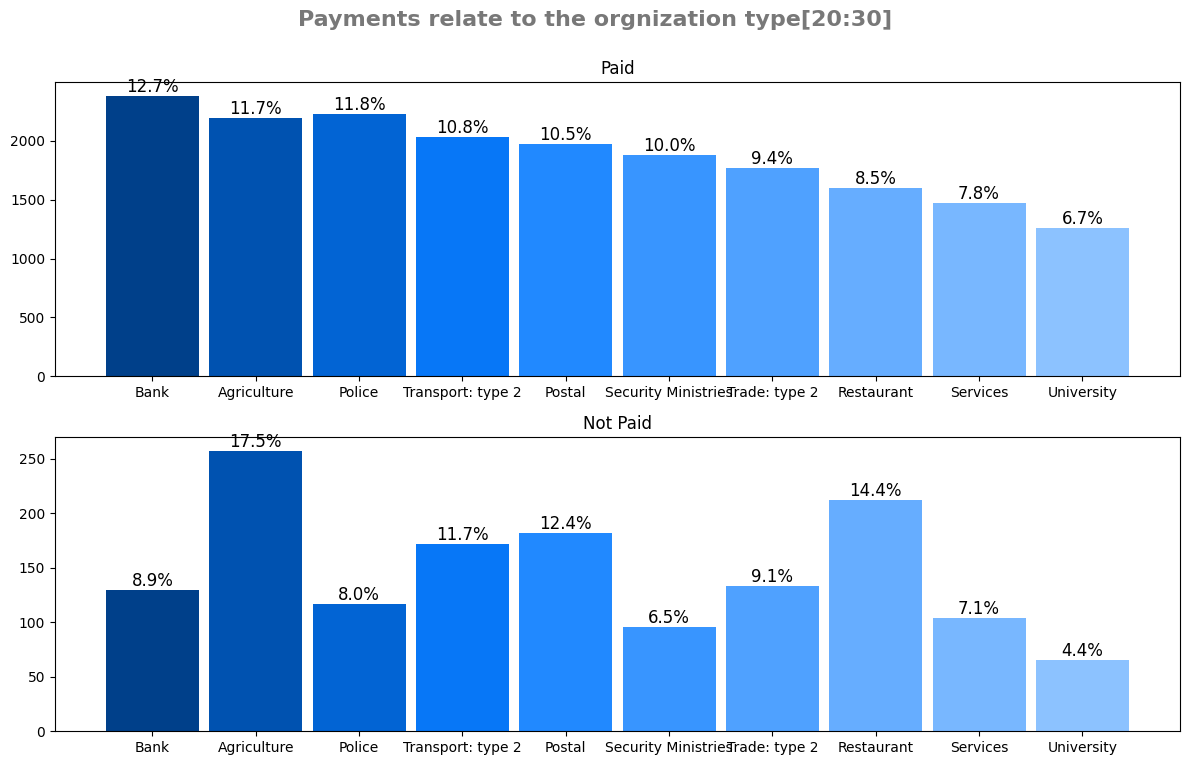

In [206]:
# organizations from 20:30
plot_two_figures(df_org[20:30], df_org['Paid'][20:30], df_org['Not Paid'][20:30], 'Payments relate to the orgnization type[20:30]')

**Clients that work in agriculture and restaurant are likely to not pay the loan.**

### Family Members Analysis

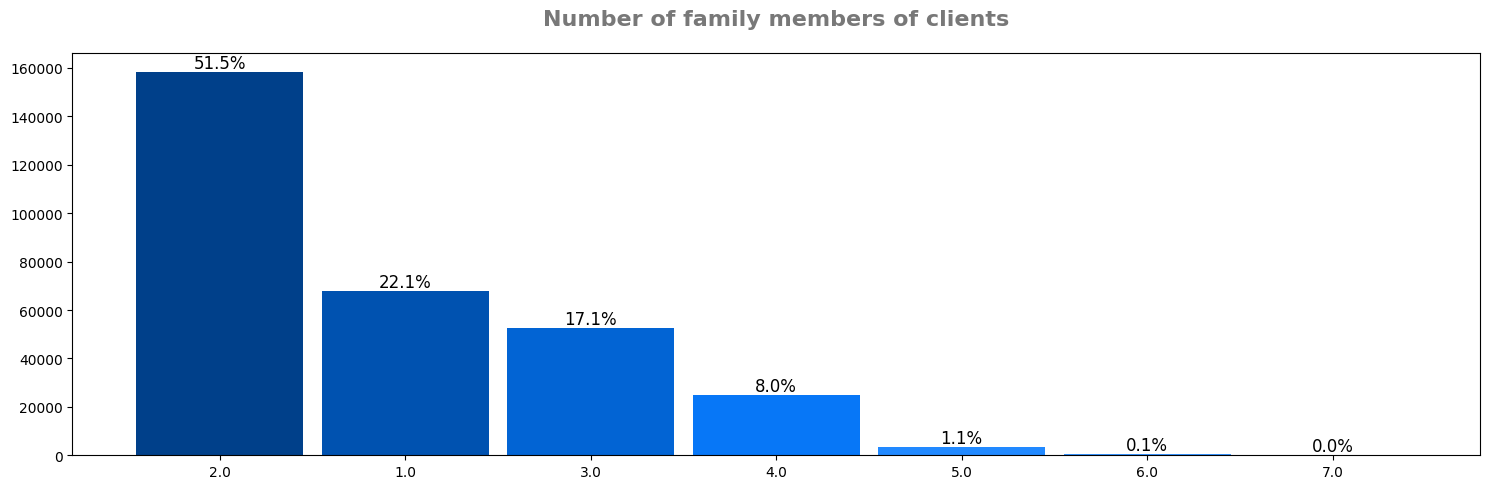

In [207]:
plot_bars(df_value_counts(train_df_filtered['CNT_FAM_MEMBERS'],\
train_df_filtered['CNT_FAM_MEMBERS'].value_counts().index)[0:7],\
train_df_filtered['CNT_FAM_MEMBERS'].value_counts().index, 'Number of family members of clients' ,True)

**Most of clients has 2 family members**

In [208]:
train_df_filtered['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     158347
1.0      67844
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

#### Check relation of **payment** and **Family_members**

In [209]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_members = pd.DataFrame({'Payment': labels})

for i in train_df_filtered['CNT_FAM_MEMBERS'].value_counts().index:
    value = train_df_filtered[train_df_filtered['CNT_FAM_MEMBERS'] == i]\
    .filter(['TARGET','CNT_FAM_MEMBERS']).groupby('TARGET').count().values.ravel()
    value = pd.Series(value)
    df_members[i] = value

In [210]:
df_members

,Payment,2.0,1.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,14.0,12.0,20.0,16.0,13.0,15.0,11.0
0,Paid,146338,62169,47993,22561,3151,353,75,14,6.0,2,2.0,2.0,2.0,2.0,1.0,1.0,1.0
1,Not Paid,12009,5675,4608,2136,327,55,6,6,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
df_members.fillna(0, inplace=True)

In [212]:
df_members

,Payment,2.0,1.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,14.0,12.0,20.0,16.0,13.0,15.0,11.0
0,Paid,146338,62169,47993,22561,3151,353,75,14,6.0,2,2.0,2.0,2.0,2.0,1.0,1.0,1.0
1,Not Paid,12009,5675,4608,2136,327,55,6,6,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_members = pd.DataFrame({
        'Family_Members' : df_members.columns[1:].values,
        'Paid' : df_members[df_members['Payment'] == 'Paid'].values.ravel()[1:],
        'Not Paid': df_members[df_members['Payment'] == 'Not Paid'].values.ravel()[1:]
})

df_members

,Family_Members,Paid,Not Paid
0,2.0,146338,12009
1,1.0,62169,5675
2,3.0,47993,4608
3,4.0,22561,2136
4,5.0,3151,327
5,6.0,353,55
6,7.0,75,6
7,8.0,14,6
8,9.0,6.0,0.0
9,10.0,2,1


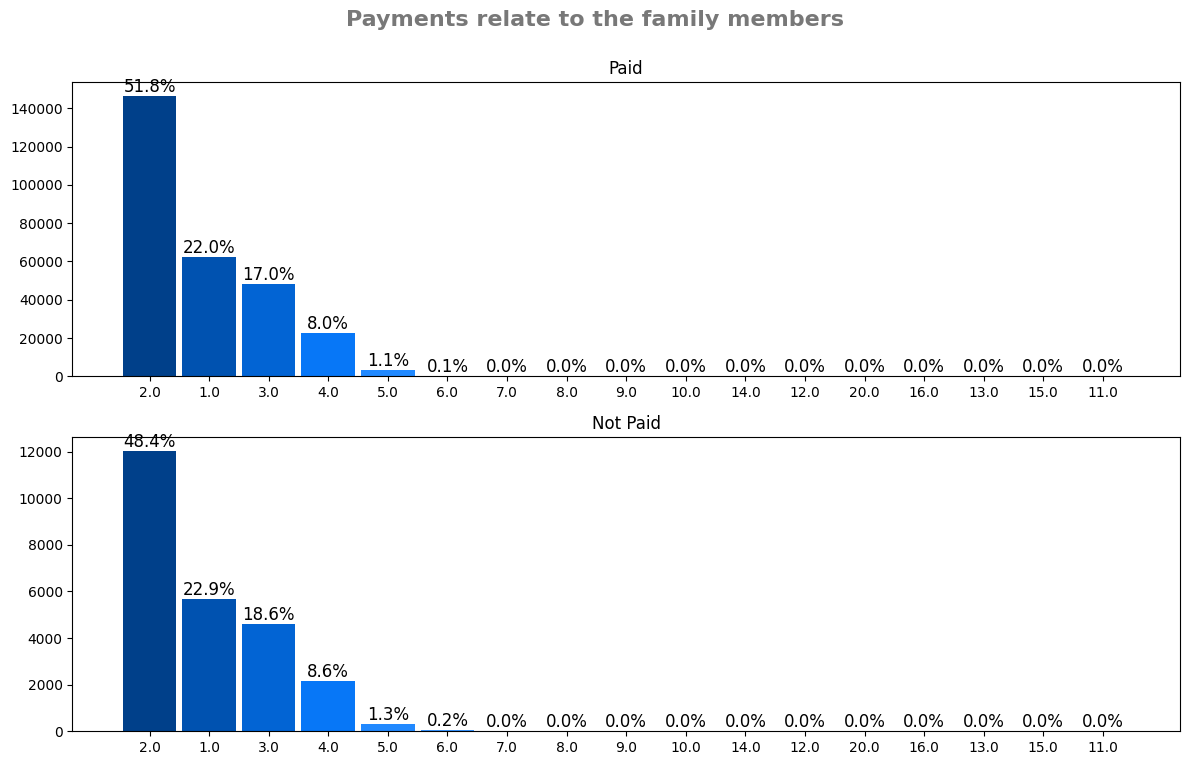

In [214]:
plot_two_figures(df_members, df_members['Paid'], df_members['Not Paid'], 'Payments relate to the family members')

**clients that with high num of family members, the greater the number the more chance of not paying the loan**